In [91]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [92]:
csv_path = Path('SMA_Analysis/Stocks/ABBV.csv')
abbv_df=pd.read_csv(csv_path)
abbv_df = abbv_df.set_index(pd.DatetimeIndex(abbv_df['Date'].values))
abbv_df['daily_return'] = abbv_df['Close'].dropna().pct_change()
abbv_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return
2016-01-21,2016-01-21,45.215070,46.383132,44.923052,46.059547,12097000,0.0,0,NaN
2016-01-22,2016-01-22,46.643578,46.904026,45.633363,46.430489,10383800,0.0,0,0.008054
2016-01-25,2016-01-25,46.588335,47.203938,45.917489,46.288429,9681900,0.0,0,-0.003060
2016-01-26,2016-01-26,46.572560,46.777762,45.151944,45.980637,7421100,0.0,0,-0.006649
2016-01-27,2016-01-27,46.059557,46.509418,44.552124,45.073017,9077700,0.0,0,-0.019739


In [93]:
#Calculate MACD and Signal line indicators
#Calcualte short term exponential moving average (EMA)
ShortEMA = abbv_df.Close.ewm(span=12, adjust=False).mean()
#Calculate the long term EMA
LongEMA = abbv_df.Close.ewm(span=26, adjust=False).mean()
#Calculate MACD
MACD = ShortEMA - LongEMA
#calculate signal line
signal = MACD.ewm(span=9, adjust=False).mean()
#create new columns for data
abbv_df['ShortEMA'] = ShortEMA
abbv_df['LongEMA'] = LongEMA
abbv_df['MACD'] = MACD
abbv_df['Signal Line'] = signal
#show the data
abbv_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,LongEMA,MACD,Signal Line
2016-01-21,2016-01-21,45.215070,46.383132,44.923052,46.059547,12097000,0.0,0,NaN,46.059547,46.059547,0.000000,0.000000
2016-01-22,2016-01-22,46.643578,46.904026,45.633363,46.430489,10383800,0.0,0,0.008054,46.116615,46.087025,0.029591,0.005918
2016-01-25,2016-01-25,46.588335,47.203938,45.917489,46.288429,9681900,0.0,0,-0.003060,46.143048,46.101943,0.041105,0.012955
2016-01-26,2016-01-26,46.572560,46.777762,45.151944,45.980637,7421100,0.0,0,-0.006649,46.118062,46.092958,0.025104,0.015385
2016-01-27,2016-01-27,46.059557,46.509418,44.552124,45.073017,9077700,0.0,0,-0.019739,45.957286,46.017407,-0.060121,0.000284


In [94]:
#Calculate RS and RSI
#Get difference in price
delta = abbv_df['Close'].diff(1)
delta = delta.dropna()
up = delta.copy()
down = delta.copy()

up[up<0]=0
down[down>0] = 0

#get time period
period = 14 
#calculate avg gain and average loss
AVG_Gain = up.rolling(window=period).mean()
AVG_Loss = abs(down.rolling(window=period).mean())

#calculate Relative Strength (RS)
RS = AVG_Gain / AVG_Loss

#calcvulate the RSI
RSI = 100.0 - (100.0 / (1.0 +RS))

#create new columns for data
abbv_df['RSI'] = RSI
abbv_df.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,LongEMA,MACD,Signal Line,RSI
2016-01-21,2016-01-21,45.215070,46.383132,44.923052,46.059547,12097000,0.0,0,NaN,46.059547,46.059547,0.000000,0.000000,NaN
2016-01-22,2016-01-22,46.643578,46.904026,45.633363,46.430489,10383800,0.0,0,0.008054,46.116615,46.087025,0.029591,0.005918,NaN
2016-01-25,2016-01-25,46.588335,47.203938,45.917489,46.288429,9681900,0.0,0,-0.003060,46.143048,46.101943,0.041105,0.012955,NaN
2016-01-26,2016-01-26,46.572560,46.777762,45.151944,45.980637,7421100,0.0,0,-0.006649,46.118062,46.092958,0.025104,0.015385,NaN
2016-01-27,2016-01-27,46.059557,46.509418,44.552124,45.073017,9077700,0.0,0,-0.019739,45.957286,46.017407,-0.060121,0.000284,NaN


In [104]:
#create Momentum Indicator
span=10
Close = abbv_df["Close"]

#create 10 day exponential moving average 
sma = Close.rolling(window=span, min_periods=span).mean()[:10]
rest = Close[10:]
TD = pd.concat([sma, rest]).ewm(span=span, adjust=False).mean()

MOMENTUM_A = 100 * (Close/TD)
abbv_df['MOMENTUM_A'] = MOMENTUM_A
abbv_df.head(25)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,LongEMA,MACD,Signal Line,RSI,MOMENTUM_A
2016-01-21,2016-01-21,45.215070,46.383132,44.923052,46.059547,12097000,0.0,0,NaN,46.059547,46.059547,0.000000,0.000000,NaN,NaN
2016-01-22,2016-01-22,46.643578,46.904026,45.633363,46.430489,10383800,0.0,0,0.008054,46.116615,46.087025,0.029591,0.005918,NaN,NaN
2016-01-25,2016-01-25,46.588335,47.203938,45.917489,46.288429,9681900,0.0,0,-0.003060,46.143048,46.101943,0.041105,0.012955,NaN,NaN
2016-01-26,2016-01-26,46.572560,46.777762,45.151944,45.980637,7421100,0.0,0,-0.006649,46.118062,46.092958,0.025104,0.015385,NaN,NaN
2016-01-27,2016-01-27,46.059557,46.509418,44.552124,45.073017,9077700,0.0,0,-0.019739,45.957286,46.017407,-0.060121,0.000284,NaN,NaN
2016-01-28,2016-01-28,45.167723,45.562339,43.234105,44.078583,10521100,0.0,0,-0.022063,45.668254,45.873790,-0.205536,-0.040880,NaN,NaN
2016-01-29,2016-01-29,42.160746,43.652396,42.160746,43.328812,17768700,0.0,0,-0.017010,45.308340,45.685273,-0.376933,-0.108091,NaN,NaN
2016-02-01,2016-02-01,42.744781,43.313029,41.442548,42.926304,11693300,0.0,0,-0.009290,44.941873,45.480905,-0.539032,-0.194279,NaN,NaN
2016-02-02,2016-02-02,42.334389,43.234113,42.081835,42.579052,7918300,0.0,0,-0.008089,44.578362,45.265953,-0.687591,-0.292941,NaN,NaN
2016-02-03,2016-02-03,43.036795,45.128259,42.657964,44.859921,16435700,0.0,0,0.053568,44.621679,45.235876,-0.614198,-0.357192,NaN,100.222164


In [106]:
# Construct a crossover trading signal for MACD
abbv_df['crossover_long'] = np.where(abbv_df['MACD'] > abbv_df['Signal Line'], 1.0, 0.0)
abbv_df['crossover_short'] = np.where(abbv_df['MACD'] < abbv_df['Signal Line'], -1.0, 0.0)
abbv_df['MACD_Signal'] = abbv_df['crossover_long'] + abbv_df['crossover_short']


# Construct crossover trading signal for RSI
abbv_df['oversold'] = np.where(abbv_df['RSI'] < 30, 1.0, 0.0)
abbv_df['overbought'] = np.where(abbv_df['RSI'] > 70, -1.0, 0.0)
abbv_df['RSI_Signal'] = abbv_df['oversold'] + abbv_df['overbought']

# Construct crossover trading signal for Momentum
abbv_df['momentum_buy'] = np.where(abbv_df['MOMENTUM_A'] > 100, 1.0, 0.0)
abbv_df['momentum_sell'] = np.where(abbv_df['MOMENTUM_A'] < 100, -1.0, 0.0)
abbv_df['momentum_signal'] = abbv_df['momentum_buy'] + abbv_df['momentum_sell']

abbv_df.head(25)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,...,MOMENTUM_A,crossover_long,crossover_short,MACD_Signal,oversold,overbought,RSI_Signal,momentum_buy,momentum_sell,momentum_signal
2016-01-21,2016-01-21,45.215070,46.383132,44.923052,46.059547,12097000,0.0,0,NaN,46.059547,...,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-22,2016-01-22,46.643578,46.904026,45.633363,46.430489,10383800,0.0,0,0.008054,46.116615,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-25,2016-01-25,46.588335,47.203938,45.917489,46.288429,9681900,0.0,0,-0.003060,46.143048,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-26,2016-01-26,46.572560,46.777762,45.151944,45.980637,7421100,0.0,0,-0.006649,46.118062,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-27,2016-01-27,46.059557,46.509418,44.552124,45.073017,9077700,0.0,0,-0.019739,45.957286,...,NaN,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-28,2016-01-28,45.167723,45.562339,43.234105,44.078583,10521100,0.0,0,-0.022063,45.668254,...,NaN,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-29,2016-01-29,42.160746,43.652396,42.160746,43.328812,17768700,0.0,0,-0.017010,45.308340,...,NaN,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-01,2016-02-01,42.744781,43.313029,41.442548,42.926304,11693300,0.0,0,-0.009290,44.941873,...,NaN,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-02,2016-02-02,42.334389,43.234113,42.081835,42.579052,7918300,0.0,0,-0.008089,44.578362,...,NaN,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-02-03,2016-02-03,43.036795,45.128259,42.657964,44.859921,16435700,0.0,0,0.053568,44.621679,...,100.222164,0.0,-1.0,-1.0,0.0,0.0,0.0,1.0,0.0,1.0


In [107]:
 # Set x variable list of features
x_var_list = ['MACD_Signal', 'RSI_Signal','momentum_signal']
abbv_df[x_var_list].head()

,MACD_Signal,RSI_Signal,momentum_signal
2016-01-21,0.0,0.0,0.0
2016-01-22,1.0,0.0,0.0
2016-01-25,1.0,0.0,0.0
2016-01-26,1.0,0.0,0.0
2016-01-27,-1.0,0.0,0.0


In [108]:
abbv_df[x_var_list] = abbv_df[x_var_list].shift(1)
abbv_df[x_var_list].head()

,MACD_Signal,RSI_Signal,momentum_signal
2016-01-21,NaN,NaN,NaN
2016-01-22,0.0,0.0,0.0
2016-01-25,1.0,0.0,0.0
2016-01-26,1.0,0.0,0.0
2016-01-27,1.0,0.0,0.0


In [109]:
# Drop NAs and replace positive/negative infinity values
abbv_df.dropna(subset=x_var_list, inplace=True)
abbv_df.dropna(subset=['daily_return'], inplace=True)
abbv_df = abbv_df.replace([np.inf, -np.inf], np.nan)
abbv_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,...,MOMENTUM_A,crossover_long,crossover_short,MACD_Signal,oversold,overbought,RSI_Signal,momentum_buy,momentum_sell,momentum_signal
2016-01-22,2016-01-22,46.643578,46.904026,45.633363,46.430489,10383800,0.0,0,0.008054,46.116615,...,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-25,2016-01-25,46.588335,47.203938,45.917489,46.288429,9681900,0.0,0,-0.003060,46.143048,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-26,2016-01-26,46.572560,46.777762,45.151944,45.980637,7421100,0.0,0,-0.006649,46.118062,...,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-27,2016-01-27,46.059557,46.509418,44.552124,45.073017,9077700,0.0,0,-0.019739,45.957286,...,NaN,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-28,2016-01-28,45.167723,45.562339,43.234105,44.078583,10521100,0.0,0,-0.022063,45.668254,...,NaN,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [110]:
# Construct the dependent variable where if daily return is greater than 0, then 1, else, 0.
abbv_df['Positive Return'] = np.where(abbv_df['daily_return'] > 0, 1.0, 0.0)
abbv_df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily_return,ShortEMA,...,crossover_long,crossover_short,MACD_Signal,oversold,overbought,RSI_Signal,momentum_buy,momentum_sell,momentum_signal,Positive Return
2016-01-22,2016-01-22,46.643578,46.904026,45.633363,46.430489,10383800,0.0,0,0.008054,46.116615,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2016-01-25,2016-01-25,46.588335,47.203938,45.917489,46.288429,9681900,0.0,0,-0.003060,46.143048,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-26,2016-01-26,46.572560,46.777762,45.151944,45.980637,7421100,0.0,0,-0.006649,46.118062,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-27,2016-01-27,46.059557,46.509418,44.552124,45.073017,9077700,0.0,0,-0.019739,45.957286,...,0.0,-1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2016-01-28,2016-01-28,45.167723,45.562339,43.234105,44.078583,10521100,0.0,0,-0.022063,45.668254,...,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [111]:
# Construct training start and end dates
training_start = abbv_df.index.min().strftime(format= '%Y-%m-%d')
training_end = '2019-12-31'

# Construct testing start and end dates
testing_start =  '2020-01-01'
testing_end = abbv_df.index.max().strftime(format= '%Y-%m-%d')

# Print training and testing start/end dates
print(f"Training Start: {training_start}")
print(f"Training End: {training_end}")
print(f"Testing Start: {testing_start}")
print(f"Testing End: {testing_end}")

Training Start: 2016-01-22
Training End: 2019-12-31
Testing Start: 2020-01-01
Testing End: 2021-01-20


In [112]:
X_train = abbv_df[x_var_list][training_start:training_end]
y_train = abbv_df['Positive Return'][training_start:training_end]

X_train.head()

,MACD_Signal,RSI_Signal,momentum_signal
2016-01-22,0.0,0.0,0.0
2016-01-25,1.0,0.0,0.0
2016-01-26,1.0,0.0,0.0
2016-01-27,1.0,0.0,0.0
2016-01-28,-1.0,0.0,0.0


In [113]:
y_train.head()

2016-01-22    1.0
2016-01-25    0.0
2016-01-26    0.0
2016-01-27    0.0
2016-01-28    0.0
Name: Positive Return, dtype: float64

In [114]:
# Construct the X test and y test datasets
X_test = abbv_df[x_var_list][testing_start:testing_end]
y_test = abbv_df['Positive Return'][testing_start:testing_end]
X_test.head()

,MACD_Signal,RSI_Signal,momentum_signal
2020-01-02,-1.0,0.0,-1.0
2020-01-03,-1.0,0.0,1.0
2020-01-06,-1.0,0.0,-1.0
2020-01-07,-1.0,0.0,1.0
2020-01-08,-1.0,0.0,-1.0


In [115]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [116]:
 # Fit a SKLearn linear regression using just the training set (X_train, Y_train):
model = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)
model.fit(X_train, y_train)

# Make a prediction of "y" values from the X_test dataset
Predictions = model.predict(X_test)

# Assemble actual y data (Y_test) with predicted y data (from just above) into two columns in a dataframe:
Results = y_test.to_frame()
Results["Predicted Value"] = Predictions
Results.head()

,Positive Return,Predicted Value
2020-01-02,1.0,1.0
2020-01-03,0.0,1.0
2020-01-06,1.0,1.0
2020-01-07,0.0,1.0
2020-01-08,1.0,1.0


In [117]:
X_train.head(25)

,MACD_Signal,RSI_Signal,momentum_signal
2016-01-22,0.0,0.0,0.0
2016-01-25,1.0,0.0,0.0
2016-01-26,1.0,0.0,0.0
2016-01-27,1.0,0.0,0.0
2016-01-28,-1.0,0.0,0.0
2016-01-29,-1.0,0.0,0.0
2016-02-01,-1.0,0.0,0.0
2016-02-02,-1.0,0.0,0.0
2016-02-03,-1.0,0.0,0.0
2016-02-04,-1.0,0.0,1.0


In [118]:
y_train.head(25)

2016-01-22    1.0
2016-01-25    0.0
2016-01-26    0.0
2016-01-27    0.0
2016-01-28    0.0
2016-01-29    0.0
2016-02-01    0.0
2016-02-02    0.0
2016-02-03    1.0
2016-02-04    0.0
2016-02-05    0.0
2016-02-08    0.0
2016-02-09    1.0
2016-02-10    0.0
2016-02-11    0.0
2016-02-12    1.0
2016-02-16    1.0
2016-02-17    1.0
2016-02-18    0.0
2016-02-19    0.0
2016-02-22    1.0
2016-02-23    0.0
2016-02-24    0.0
2016-02-25    1.0
2016-02-26    0.0
Name: Positive Return, dtype: float64

In [119]:
# Save the pre-trained model
from joblib import dump, load
dump(model, 'random_forest_model.joblib')

['random_forest_model.joblib']

In [120]:
model = load('random_forest_model.joblib')
predictions = model.predict(X_test)
predictions

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [121]:
Results['Predicted Value'] = predictions
Results

,Positive Return,Predicted Value
2020-01-02,1.0,1.0
2020-01-03,0.0,1.0
2020-01-06,1.0,1.0
2020-01-07,0.0,1.0
2020-01-08,1.0,1.0
2020-01-09,1.0,1.0
2020-01-10,0.0,1.0
2020-01-13,0.0,1.0
2020-01-14,1.0,1.0
2020-01-15,1.0,1.0


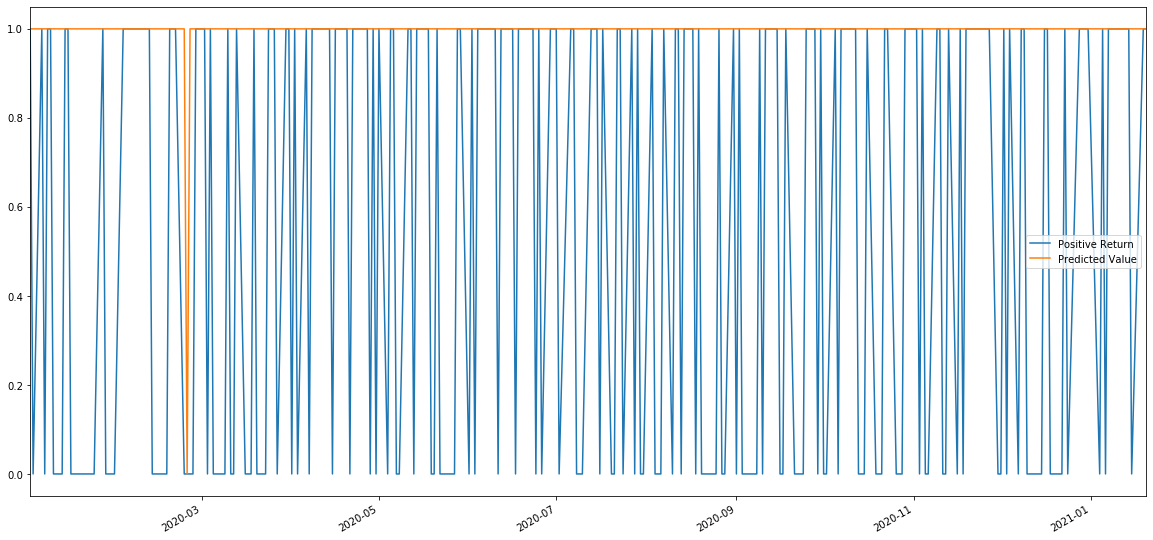

In [122]:
# Plot predicted results vs. actual results
Results[['Positive Return', 'Predicted Value']].plot(figsize=(20,10))

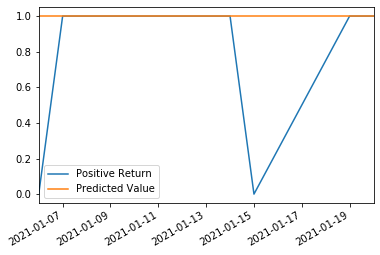

In [123]:
# Plot last 10 records of predicted vs. actual results
Results[['Positive Return', 'Predicted Value']].tail(10).plot()